# Analysing the Ted talk data

Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length. What's even more incredible is that their invaluable insights is available on the Internet for free.

Since the time we have begun watching TED Talks, they have never ceased to amaze us. We have learned an incredible amount, about fields we were completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor. So in this notebook, we are attempting at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions.

#### Features Available

   * name: The official name of the TED Talk. Includes the title and the speaker.
   * title: The title of the talk
   * description: A blurb of what the talk is about.
   * main_speaker: The first named speaker of the talk.
   * speaker_occupation: The occupation of the main speaker.
   * num_speaker: The number of speakers in the talk.
   * duration: The duration of the talk in seconds.
   * event: The TED/TEDx event where the talk took place.
   * film_date: The Unix timestamp of the filming.
   * published_date: The Unix timestamp for the publication of the talk on TED.com
   * comments: The number of first level comments made on the talk.
   * tags: The themes associated with the talk.
   * languages: The number of languages in which the talk is available.
   * ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
   * related_talks: A list of dictionaries of recommended talks to watch next.
   * url: The URL of the talk.
   * views: The number of views on the talk.
 

## Loading and reading the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv('../data/ted.csv')

In [3]:
data.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                2550 non-null   object
 1   title               2550 non-null   object
 2   description         2550 non-null   object
 3   main_speaker        2550 non-null   object
 4   speaker_occupation  2544 non-null   object
 5   num_speaker         2550 non-null   int64 
 6   duration            2550 non-null   int64 
 7   event               2550 non-null   object
 8   film_date           2550 non-null   object
 9   published_date      2550 non-null   object
 10  comments            2550 non-null   int64 
 11  tags                2550 non-null   object
 12  languages           2550 non-null   int64 
 13  ratings             2550 non-null   object
 14  related_talks       2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [5]:
data.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


## Which are the top 15 most viewed talks of all time? 

In [6]:
# data.sort_values(by= 'views', ascending = False )['main_speaker'][:15]
data_top_15 = data[['main_speaker','title','views']].sort_values(by= 'views', ascending = False )[:15]
# data.iloc[data['views'].sort_values(ascending  = False).nlargest(15).index]
data_top_15

,main_speaker,title,views
0,Ken Robinson,Do schools kill creativity?,47227110
1346,Amy Cuddy,Your body language may shape who you are,43155405
677,Simon Sinek,How great leaders inspire action,34309432
837,Brené Brown,The power of vulnerability,31168150
452,Mary Roach,10 things you didn't know about orgasm,22270883
1776,Julian Treasure,How to speak so that people want to listen,21594632
201,Jill Bolte Taylor,My stroke of insight,21190883
5,Tony Robbins,Why we do what we do,20685401
2114,James Veitch,This is what happens when you reply to spam email,20475972
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",19787465


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ken Robinson'),
  Text(1, 0, 'Amy Cuddy'),
  Text(2, 0, 'Simon Sinek'),
  Text(3, 0, 'Brené Brown'),
  Text(4, 0, 'Mary Roach'),
  Text(5, 0, 'Julian Treasure'),
  Text(6, 0, 'Jill Bolte Taylor'),
  Text(7, 0, 'Tony Robbins'),
  Text(8, 0, 'James Veitch'),
  Text(9, 0, 'Cameron Russell')])

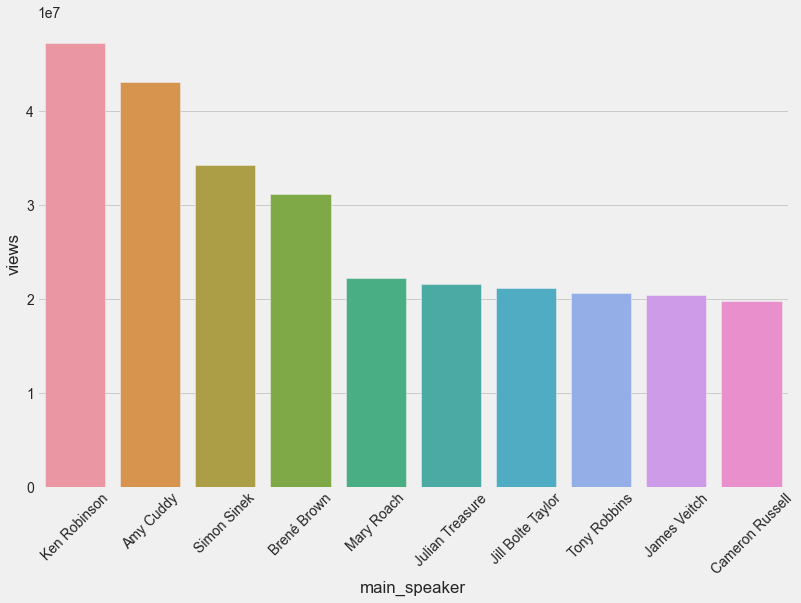

In [7]:
# data[['main_speaker','views']].sort_values(by= 'views', ascending = False )[:15].plot(kind = 'bar')
plt.figure(figsize = (12,8))
sns.barplot(x = 'main_speaker', y = 'views', data = data_top_15.iloc[:10,:])
plt.xticks(rotation = 45)

## Find out the distribution and summary statistics of views and comments

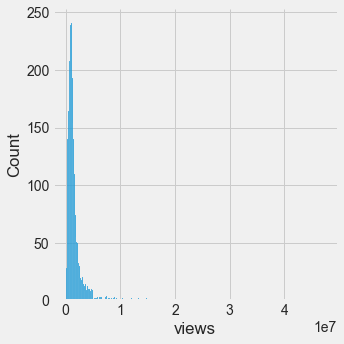

In [10]:
sns.displot(data['views'])

<AxesSubplot:xlabel='views', ylabel='Density'>

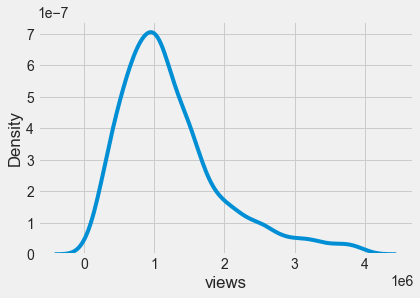

In [14]:
sns.kdeplot(data[data['views']<4000000]['views'])

<AxesSubplot:ylabel='Density'>

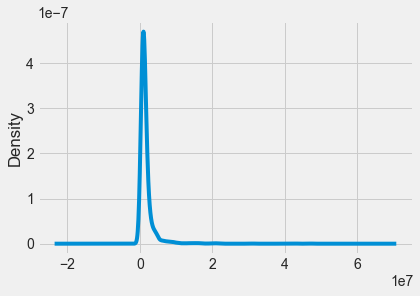

In [15]:
data.views.plot.density()

## Is there any co-relation between views and comments?

In [16]:
data[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


<AxesSubplot:xlabel='views', ylabel='comments'>

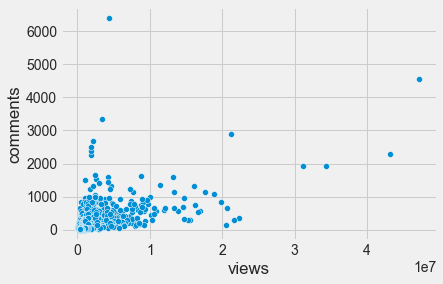

In [17]:
sns.scatterplot(data= data, x = 'views', y = 'comments')

## Let us now check the number of views and comments on the 10 most commented TED Talks of all time. What are your observations?

In [18]:
data[['main_speaker','title','comments','views']].sort_values(by = 'comments', ascending = False)[:10]

,main_speaker,title,comments,views
96,Richard Dawkins,Militant atheism,6404,4374792
0,Ken Robinson,Do schools kill creativity?,4553,47227110
644,Sam Harris,Science can answer moral questions,3356,3433437
201,Jill Bolte Taylor,My stroke of insight,2877,21190883
1787,David Chalmers,How do you explain consciousness?,2673,2162764
954,Janet Echelman,Taking imagination seriously,2492,1832930
840,Lesley Hazleton,On reading the Koran,2374,1847256
1346,Amy Cuddy,Your body language may shape who you are,2290,43155405
661,Michael Specter,The danger of science denial,2272,1838628
677,Simon Sinek,How great leaders inspire action,1930,34309432


In [19]:
data['comments']/data['views']

0       0.000096
1       0.000083
2       0.000076
3       0.000118
4       0.000049
          ...   
2545    0.000038
2546    0.000014
2547    0.000027
2548    0.000076
2549    0.000020
Length: 2550, dtype: float64

## Which talks tend to attract the largest amount of discussion?


In [20]:
data['lar_discuss'] = data['comments']/data['views']
data[['main_speaker','title','lar_discuss']].sort_values(by = 'lar_discuss', ascending = False)[:10]

,main_speaker,title,lar_discuss
744,Diane J. Savino,The case for same-sex marriage,0.002220
803,David Bismark,E-voting without fraud,0.001534
96,Richard Dawkins,Militant atheism,0.001464
694,Sharmeen Obaid-Chinoy,Inside a school for suicide bombers,0.001421
954,Janet Echelman,Taking imagination seriously,0.001360
840,Lesley Hazleton,On reading the Koran,0.001285
876,Elizabeth Lindsey,Curating humanity's heritage,0.001264
1787,David Chalmers,How do you explain consciousness?,0.001236
661,Michael Specter,The danger of science denial,0.001236
561,Mallika Sarabhai,Dance to change the world,0.001235


## Who are the top speakers?

In [21]:
data['main_speaker'].value_counts()[:10]

Hans Rosling            9
Juan Enriquez           7
Marco Tempest           6
Rives                   6
Dan Ariely              5
Jacqueline Novogratz    5
Clay Shirky             5
Bill Gates              5
Nicholas Negroponte     5
Julian Treasure         5
Name: main_speaker, dtype: int64

## Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.

In [22]:
data['speaker_occupation'].value_counts()[:10]

Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

## Do some professions tend to attract a larger number of viewers? 


In [23]:
data.groupby('speaker_occupation')['views'].sum().sort_values(ascending = False)[:10]

speaker_occupation
Writer                      133549303
Psychologist                 90851398
Author/educator              63006281
Entrepreneur                 61764022
Social psychologist          56813602
Leadership expert            48203767
Journalist                   47860783
Designer                     43294187
Neuroscientist               40889730
Vulnerability researcher     39157044
Name: views, dtype: int64

## Convert the duration column in minutes, find the details of the longest and shortest Ted talks in terms of duration.

In [24]:
shortest = data.iloc[(data['duration']/60).sort_values(ascending = True)[:1].index]
longest = data.iloc[(data['duration']/60).sort_values(ascending = False)[:1].index]
print(shortest[['name','title']])
print(longest[['name','title']])

                                           name                     title
239  Murray Gell-Mann: The ancestor of language  The ancestor of language
                                                  name  \
640  Douglas Adams: Parrots, the universe and every...   

                                    title  
640  Parrots, the universe and everything  
